In [155]:
#importing all necessary data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# calculation pakages and other
from scipy import stats
import math
import pickle

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [77]:
#getting the data and viewing infomation
# isolating only apples we want 
train_df = pd.read_csv('df-train_set.csv')
df = train_df[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']
test_df = pd.read_csv('df-test_set.csv')
test_id = test_df['Index']
test_df = test_df.drop('Index', axis=1)


df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [12]:
# analysing data types of given data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [13]:
#checking to see if there are any null values in data frame
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [14]:
#viewing statistical infomation about data
df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


(64376, 13)

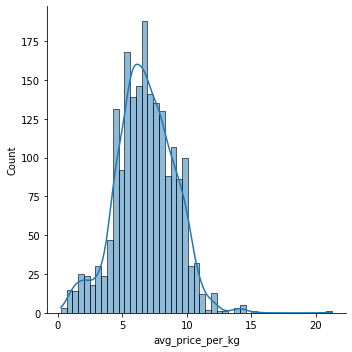

In [16]:
#getting view of distribution of avg price per kg 
sns.displot(df.avg_price_per_kg, kde=True)

In [115]:
#making predictions 
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=41)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [158]:
#declaring y value because its the same throughtout the notebook
model = LinearRegression(n_jobs=4)
y = df.avg_price_per_kg

In [159]:
# fit the model to the data and make predictions - GrLivArea
X = df.Weight_Kg.values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.139614421281688,
 'Train R^2': 0.10216325427108852,
 'Test RMSE': 2.0197026857229576,
 'Test R^2': 0.15969535456336081}

In [93]:
# fit the model to the data and make predictions - GrLivArea
X = df.Low_Price.values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.2372703907677454,
 'Train R^2': 0.018335032036834065,
 'Test RMSE': 2.1788618037992804,
 'Test R^2': 0.022039644564199157}

In [163]:
# fit the model to the data and make predictions firstly to container
X = df[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand'	]].values
fit_and_evaluate(model,X,y)

# 'Weight_Kg''Low_Price''High_Price''Sales_Total''Total_Qty_Sold''Total_Kg_Sold'	'Stock_On_Hand'	

{'Train RMSE': 1.8144625671931984,
 'Train R^2': 0.35431251474965353,
 'Test RMSE': 1.6690675647416733,
 'Test R^2': 0.4261350323215294}

In [142]:
X = df[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand'	]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
model.fit(X_train, y_train)
# new_pred = model.predict(X_test)
# new_pred[:20]

array([6.67767975, 6.67351951, 6.88080461, 6.85502858, 6.90335766,
       7.34277432, 7.6135986 , 4.64385978, 7.28907706, 5.57466609,
       6.817253  , 7.04102765, 6.37011974, 4.33140321, 3.02979079,
       5.85544873, 6.47167201, 7.46263447, 6.63694647, 1.92482374])

In [123]:
#storing model
pkl_file = "model.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [124]:
#loading model
with open(pkl_file, 'rb') as file:  
    Pickled_Model = pickle.load(file)
    
Pickled_Model

LinearRegression(n_jobs=-1)

In [83]:
df.shape, test_df.shape

((1952, 13), (685, 12))

In [134]:
pred = Pickled_Model.predict(test_df[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values)

pred[:10]

array([7.27790718, 7.36944223, 7.08551263, 7.08211535, 7.25190841,
       5.39627452, 6.76642481, 7.42829649, 7.50639921, 7.17820049])

In [143]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_id,
     'avg_price_per_kg': pred
    })

In [136]:
submission.head()

,Index,Price
0,1,7.277907
1,2,7.369442
2,3,7.085513
3,4,7.082115
4,5,7.251908


In [144]:
# save DataFrame to csv file for submission
submission.to_csv("submission.csv", index=False)